### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\Pradeepa\Desktop\analytics vidhya\train_ctrUa4K.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Visualization

<AxesSubplot:>

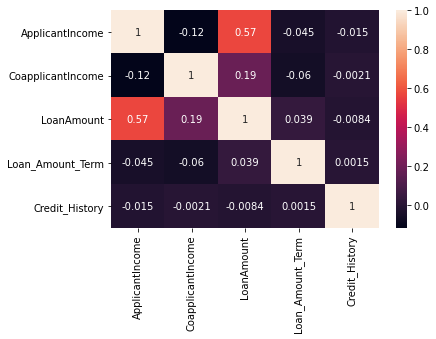

In [9]:
sns.heatmap(data.corr(),annot=True)

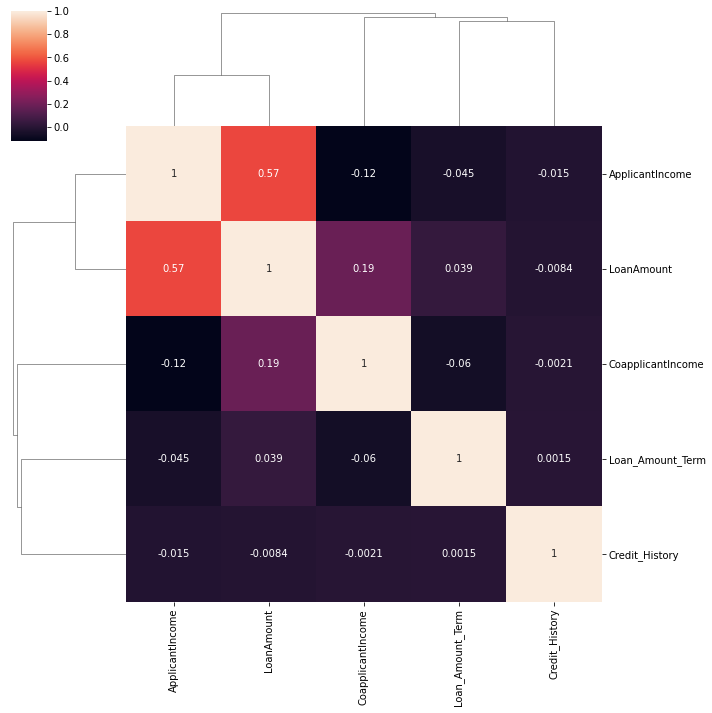

In [10]:
sns.clustermap(data.corr(),annot=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

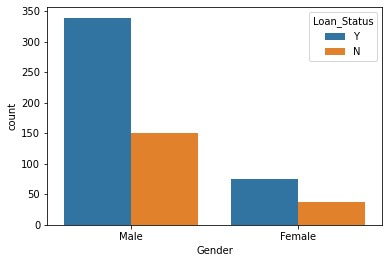

In [11]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

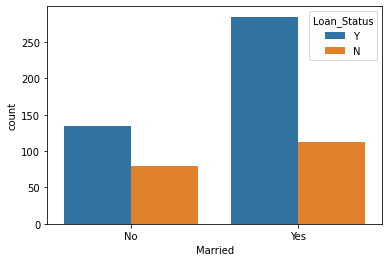

In [12]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

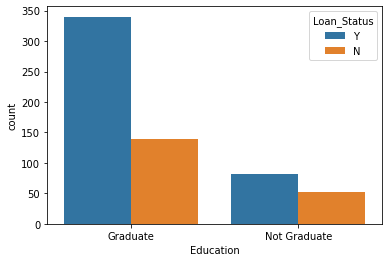

In [13]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

In [14]:
data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [15]:
data['Gender']=data['Gender'].fillna(data['Gender'].dropna().mode().values[0])
data['Gender']=data['Gender'].map({'Female':1,'Male':0})

In [16]:

data['Education'] = data['Education'].fillna( data['Education'].dropna().mode().values[0])
data['Married']=data['Married'].fillna(data['Married'].dropna().mode().values[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].dropna().mode().values[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].dropna().median())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].dropna().median())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].dropna().median())

In [17]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
data['Married'] = data['Married'].map({'No':0,'Yes':1}).astype(np.int)
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0}).astype(np.int)
data['Self_Employed']=data['Self_Employed'].map({'No':0,'Yes':1}).astype(np.int)
data['Loan_Status']=data['Loan_Status'].map({'N':0,'Y':1}).astype(np.int)

In [19]:
data.drop(['Dependents'],axis=1,inplace=True)

In [20]:
data.head(2)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,0,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0


In [21]:
data11=pd.get_dummies(data['Property_Area'],drop_first=True)

In [22]:
data11.head()

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
data=pd.concat([data,data11],axis=1)

In [24]:
data.drop('Property_Area',axis=1,inplace=True)

In [25]:
data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,LP001002,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,LP001003,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,0,1,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,LP001006,0,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,LP001008,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [26]:
X=data.drop(['Loan_Status','Loan_ID'],axis=1)
y=data['Loan_Status']

In [27]:
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,0,1,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


In [28]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [29]:
data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [32]:
print('Shape of X_train is: ',X_train.shape)
print('Shape of X_test is: ',X_test.shape)
print('Shape of Y_train is: ',y_train.shape)
print('Shape of y_test is: ',y_test.shape)

Shape of X_train is:  (540, 11)
Shape of X_test is:  (74, 11)
Shape of Y_train is:  (540,)
Shape of y_test is:  (74,)


In [33]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [34]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred=classifier.predict(X_test)

In [36]:
classifier.score(X_train,y_train)

0.8037037037037037

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8783783783783784

In [38]:
data1=pd.read_csv(r'C:\Users\Pradeepa\Desktop\analytics vidhya\test_lAUu6dG.csv')
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [39]:
data1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [40]:
dat=pd.read_csv(r'C:\Users\Pradeepa\Desktop\analytics vidhya\test_lAUu6dG.csv')

In [41]:
dat['Gender']=dat['Gender'].fillna(dat['Gender'].dropna().mode().values[0])
dat['Gender']=dat['Gender'].map({'Female':1,'Male':0})

In [42]:

dat['Education'] = dat['Education'].fillna( dat['Education'].dropna().mode().values[0])
dat['Married']=dat['Married'].fillna(dat['Married'].dropna().mode().values[0])
dat['Self_Employed']=dat['Self_Employed'].fillna(dat['Self_Employed'].dropna().mode().values[0])
dat['LoanAmount']=dat['LoanAmount'].fillna(dat['LoanAmount'].dropna().median())
dat['Loan_Amount_Term']=dat['Loan_Amount_Term'].fillna(dat['Loan_Amount_Term'].dropna().median())
dat['Credit_History']=dat['Credit_History'].fillna(dat['Credit_History'].dropna().median())
dat['Married'] = dat['Married'].map({'No':0,'Yes':1}).astype(np.int)
dat['Education']=dat['Education'].map({'Graduate':1,'Not Graduate':0}).astype(np.int)
dat['Self_Employed']=dat['Self_Employed'].map({'No':0,'Yes':1}).astype(np.int)


In [43]:
datas=pd.get_dummies(dat['Property_Area'],drop_first=True)

In [44]:
dat=pd.concat([dat,datas],axis=1)
dat.drop('Property_Area',axis=1,inplace=True)

In [45]:
dat.drop(['Dependents'],axis=1,inplace=True)

In [46]:
dat.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,LP001015,0,1,1,0,5720,0,110.0,360.0,1.0,0,1
1,LP001022,0,1,1,0,3076,1500,126.0,360.0,1.0,0,1
2,LP001031,0,1,1,0,5000,1800,208.0,360.0,1.0,0,1
3,LP001035,0,1,1,0,2340,2546,100.0,360.0,1.0,0,1
4,LP001051,0,0,0,0,3276,0,78.0,360.0,1.0,0,1


In [47]:
Loan_Id=dat['Loan_ID']
test_data = scaler.fit_transform(dat.drop(['Loan_ID'],axis=1))

In [48]:
test = pd.DataFrame(test_data)

In [49]:
test

,0,1,2,3,4,5,6,7,8,9,10
0,-0.485479,0.758358,0.544812,-0.334845,0.186461,-0.673335,-0.426780,0.266022,0.437674,-0.679817,1.273353
1,-0.485479,0.758358,0.544812,-0.334845,-0.352692,-0.029848,-0.163953,0.266022,0.437674,-0.679817,1.273353
2,-0.485479,0.758358,0.544812,-0.334845,0.039641,0.098849,1.183033,0.266022,0.437674,-0.679817,1.273353
3,-0.485479,0.758358,0.544812,-0.334845,-0.502774,0.418877,-0.591047,0.266022,0.437674,-0.679817,1.273353
4,-0.485479,-1.318638,-1.835497,-0.334845,-0.311909,-0.673335,-0.952433,0.266022,0.437674,-0.679817,1.273353
...,...,...,...,...,...,...,...,...,...,...,...
362,-0.485479,0.758358,-1.835497,2.986456,-0.162439,0.088982,-0.377500,0.266022,0.437674,-0.679817,1.273353
363,-0.485479,0.758358,0.544812,-0.334845,-0.132056,-0.369180,-0.344647,0.266022,0.437674,-0.679817,1.273353
364,-0.485479,-1.318638,0.544812,-0.334845,-0.317211,0.181644,-0.163953,0.266022,0.437674,1.470984,-0.785328
365,-0.485479,0.758358,0.544812,-0.334845,0.039641,0.353241,0.361700,0.266022,0.437674,-0.679817,-0.785328


### Prediction

In [50]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [51]:
sc = classifier.score(X_test,y_test)
sc

0.8783783783783784

In [52]:
test_pred=classifier.predict(test)

In [53]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.53      0.67        17\n           1       0.88      0.98      0.93        57\n\n    accuracy                           0.88        74\n   macro avg       0.89      0.76      0.80        74\nweighted avg       0.88      0.88      0.87        74\n'

In [56]:
confusion_matrix(y_test,y_pred)

array([[ 9,  8],
       [ 1, 56]], dtype=int64)

In [57]:
submission =  pd.DataFrame({'Loan_ID':dat['Loan_ID'],'Loan_Status':test_pred})

In [58]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [59]:
submission['Loan_Status'] = submission['Loan_Status'].map({0:'N', 1:'Y'})

In [60]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [62]:
submission.to_csv('submission2.csv',index=False)